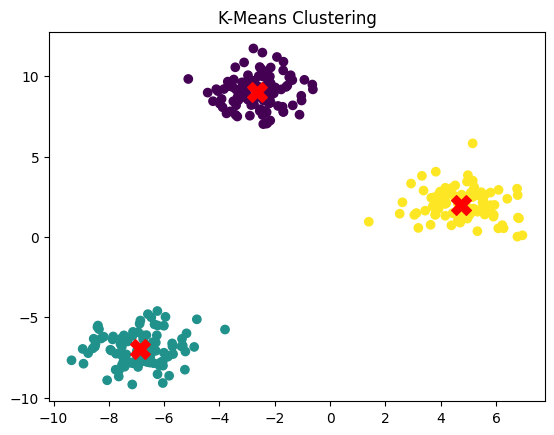

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

class KMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol  # Tolerance for convergence

    def fit(self, X):
        np.random.seed(42)
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        for _ in range(self.max_iters):
            # Assign clusters
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            # Compute new centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])

            # Check convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break

            self.centroids = new_centroids

        self.labels = labels

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply K-Means
kmeans = KMeans(k=3)
kmeans.fit(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=200)
plt.title("K-Means Clustering")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

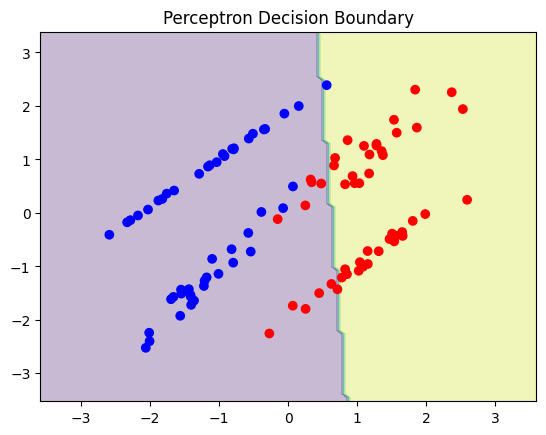

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

class Perceptron:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(len(X)):
                update = self.lr * y[i] * (np.dot(X[i], self.weights) + self.bias <= 0)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias > 0, 1, 0)

# Generate sample data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# Train Perceptron
perceptron = Perceptron(lr=0.01, epochs=10)
perceptron.fit(X, y)

# Predict and plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("Perceptron Decision Boundary")
plt.show
